# Fetch Challenge - Requirement 3

Third: Evaluate Data Quality Issues in the Data Provided

In [1]:
import pandas as pd
import seaborn as sns

## Data Quality Issue 1 - Null Values

I think the biggest issue is having too many null values. Check out this heatmap of the receipt_item_table (select columns). Yellow blocks are missing data.

In [3]:
receipt_item_table = pd.read_csv('CSV-Files/receipt_item_table.csv')

<Axes: >

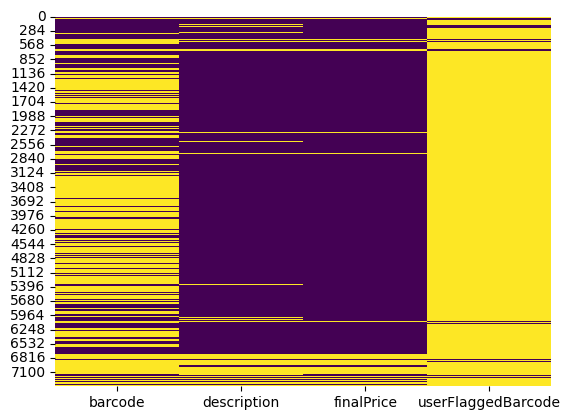

In [4]:
sns.heatmap(receipt_item_table[['barcode','description','finalPrice','userFlaggedBarcode']].isnull(),cbar=False,cmap='viridis')

Look at how many cells are missing for barcode. This is a big problem for us becuase barcode is the Foriegn Key we use to join to the brands table. With hardly any data to join on, our analysis of Brands is very restricted.

## Data Quality Issue 2 - Unclean Format for Certain Feilds

The nested nature of some fields, specifically date fields, adds an extra layer of complexity. It takes some extracting to get them into a clean format with which we can use for analysis.
- Reciepts ID here {'oid': '5ff1e1eb0a720f0523000575'} is not JOIN-ready
- dateScanned here {'date': 1609687531000} is not directly interpretable for looking at trends

## Data Quality Issue - Large Size of Certain Feilds

The rewardsReceiptItemList field holds a lot of information. It would be costly to store millions of records of these for a period of time. I think that there should be a retention policy on this data or it should be trimmed down if at all viable.

In [10]:
receipts = pd.read_json('JSON-Files/receipts.json', lines=True)

In [12]:
receipts['rewardsReceiptItemList'].iloc[4]

[{'barcode': '4011',
  'description': 'ITEM NOT FOUND',
  'finalPrice': '1',
  'itemPrice': '1',
  'partnerItemId': '1',
  'quantityPurchased': 1},
 {'barcode': '1234',
  'finalPrice': '2.56',
  'itemPrice': '2.56',
  'needsFetchReview': True,
  'needsFetchReviewReason': 'USER_FLAGGED',
  'partnerItemId': '2',
  'preventTargetGapPoints': True,
  'quantityPurchased': 3,
  'userFlaggedBarcode': '1234',
  'userFlaggedDescription': '',
  'userFlaggedNewItem': True,
  'userFlaggedPrice': '2.56',
  'userFlaggedQuantity': 3}]